In [2]:
import pandas as pd  # Si no se tiene instalada -> pip install pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pd.read_csv("Data/reviews.csv", parse_dates=["Timestamp"]) # Cargo el dataset en la variable data, que será un DataFrame de pandas.

# parse_dates convierte la columna Timestamp en un objeto de tipo datetime64

data.head()

,Course Name,Timestamp,Rating,Comment
0,Python Course,2021-04-02 06:25:52+00:00,4.0,NaN
1,Python Course,2021-04-02 05:12:34+00:00,4.0,NaN
2,Python Course,2021-04-02 05:11:03+00:00,4.0,NaN
3,Python Course,2021-04-02 03:33:24+00:00,5.0,NaN
4,Python Course,2021-04-02 03:31:49+00:00,4.5,NaN


### **Ratings medios por día**

In [3]:
data["Day"] = data["Timestamp"].dt.date              # Creo una nueva columna en el DataFrame que se llamará Day y que contendrá la fecha de la columna Timestamp
day_average = data.groupby(["Day"])["Rating"].mean() # Agrupo los datos por la columna Day y realizo la media de los valores que hay en la columna Rating
day_average.head()

Day
2018-01-01    4.532609
2018-01-02    4.122807
2018-01-03    4.360465
2018-01-04    4.531250
2018-01-05    4.423077
Name: Rating, dtype: float64

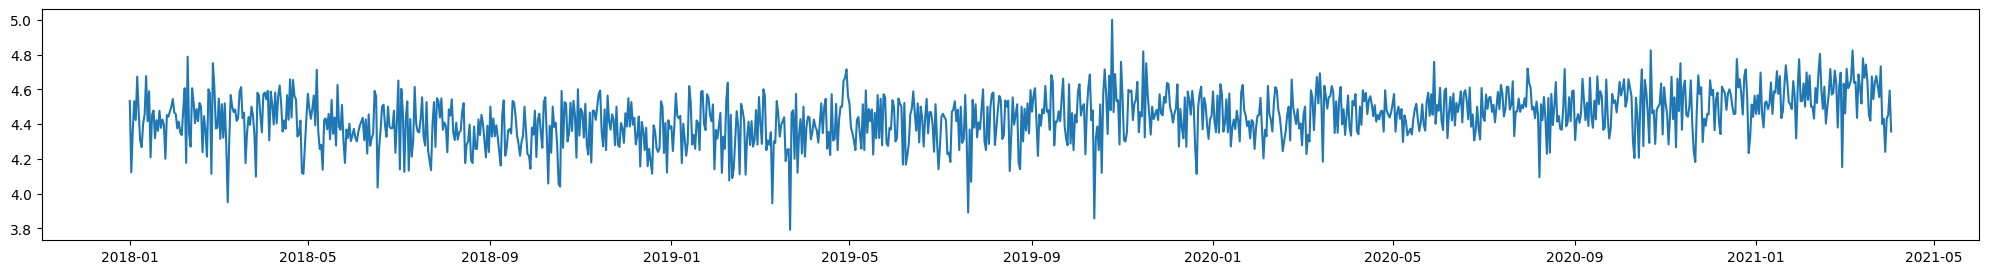

In [4]:
plt.figure(figsize=(25, 3))                     # Creo una figura de tamaño 25x3
plt.plot(day_average.index, day_average.values) # Dibujo la gráfica con los valores de la columna Timestamp y Rating

# Muestra la media de valoraciones por día recibidas

### **Ratings medios por semana**

In [5]:
data["Week"] = data["Timestamp"].dt.strftime("%Y-%U")     # Creo una nueva columna en el DataFrame que se llamará Week y que contendrá el año y semana de la columna Timestamp
week_average = data.groupby(["Week"])["Rating"].mean()    # Agrupo los datos por la columna Week y realizo la media de los valores que hay en la columna Rating
week_average.head()

Week
2018-00    4.434564
2018-01    4.424933
2018-02    4.417702
2018-03    4.401024
2018-04    4.468085
Name: Rating, dtype: float64

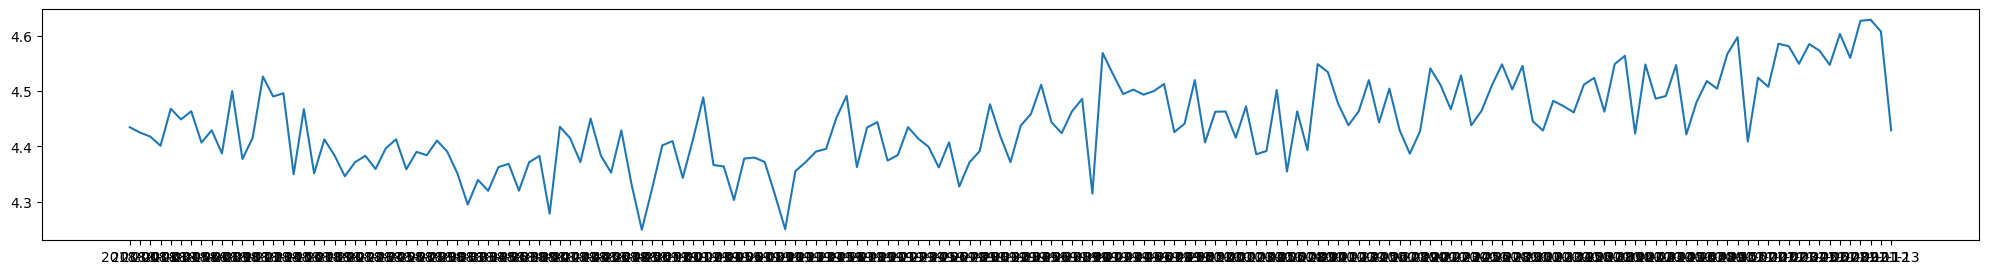

In [6]:
plt.figure(figsize=(25, 3))                       # Creo una figura de tamaño 25x3
plt.plot(week_average.index, week_average.values) # Dibujo la gráfica con los valores de la columna Week y Rating medios

# Muestra las calificaciones medias recibidas por semana

Se puede ver que hay una ligera tendencia alcista que con el gráfico diario era más dificil de deducir.

### **Ratings medios por mes**

In [ ]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")      # Creo una nueva columna en el DataFrame que se llamará Month y que contendrá el año y semana de la columna Timestamp
month_average = data.groupby(["Month"])["Rating"].mean()    # Agrupo los datos por la columna Month y realizo la media de los valores que hay en la columna Rating
month_average.head()

Month
2018-01    4.429645
2018-02    4.436248
2018-03    4.421671
2018-04    4.468211
2018-05    4.396420
Name: Rating, dtype: float64

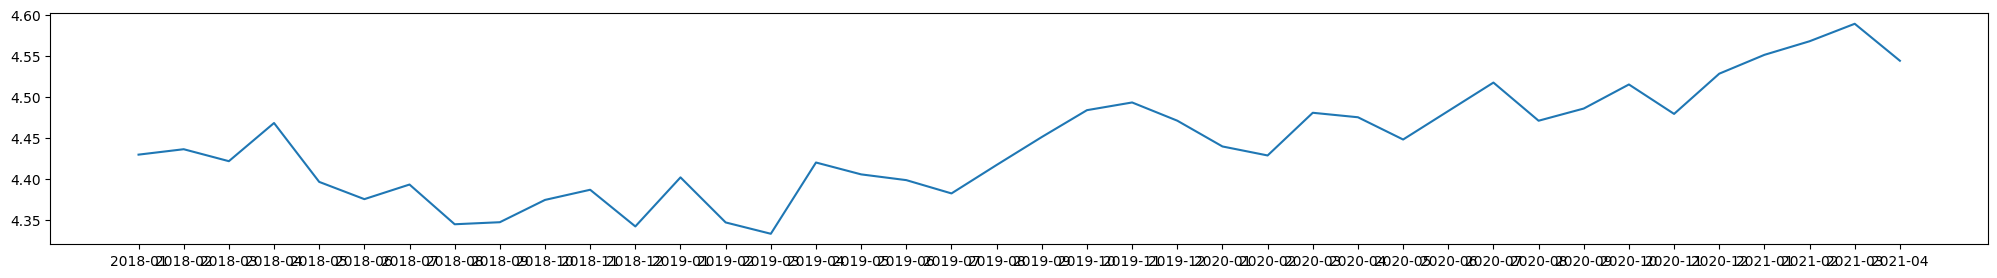

In [ ]:
plt.figure(figsize=(25, 3))                         # Creo una figura de tamaño 25x3
plt.plot(month_average.index, month_average.values) # Dibujo la gráfica con los valores de la columna Month y Rating medios

# Muestra las calificaciones medias recibidas por mes

La tendencia alcista se observa aún más claramente. Por tanto, es importante una correcta representación de los datos para poder sacar información útil de ellos.

### **Ratings medios por mes por curso**

In [ ]:
data["Month"] = data["Timestamp"].dt.strftime("%Y-%m")                # Creo una nueva columna en el DataFrame que se llamará Month y que contendrá el año y semana de la columna Timestamp
month_average_crs = data.groupby(["Month", "Course Name"])["Rating"].mean().unstack()    # Agrupo los datos por la columna Month y Nombre del curso
month_average_crs[:10] # Muestro los 10 primeros valores

# Con "unstack()" convierto el DataFrame en una tabla de 2 dimensiones
# Obtengo la valoración media mensual de cada curso

Course Name,C++ Course,Java Course,Javascript Course,Python Course,R Course,SQL Course,Scala Course,Swift Course
Month,,,,,,,,
2018-01,4.500000,NaN,NaN,4.457368,4.355422,4.285714,4.353448,4.236842
2018-02,4.205882,NaN,NaN,4.481070,4.363095,4.157895,4.250000,4.437500
2018-03,4.281250,NaN,NaN,4.447037,4.357143,4.266667,4.500000,4.166667
2018-04,4.468750,NaN,NaN,4.507412,4.378947,4.428571,4.431034,4.250000
2018-05,4.176471,NaN,NaN,4.422085,4.362654,4.107143,4.358696,4.666667
2018-06,4.631579,NaN,NaN,4.421264,4.273876,4.204545,4.268293,4.333333
2018-07,4.159091,NaN,NaN,4.436156,4.330239,4.065217,4.589286,4.277778
2018-08,4.411765,NaN,NaN,4.376494,4.283388,4.233333,4.353659,4.100000
2018-09,4.173913,NaN,NaN,4.416413,4.247967,4.500000,4.238636,4.166667


<Axes: xlabel='Month'>

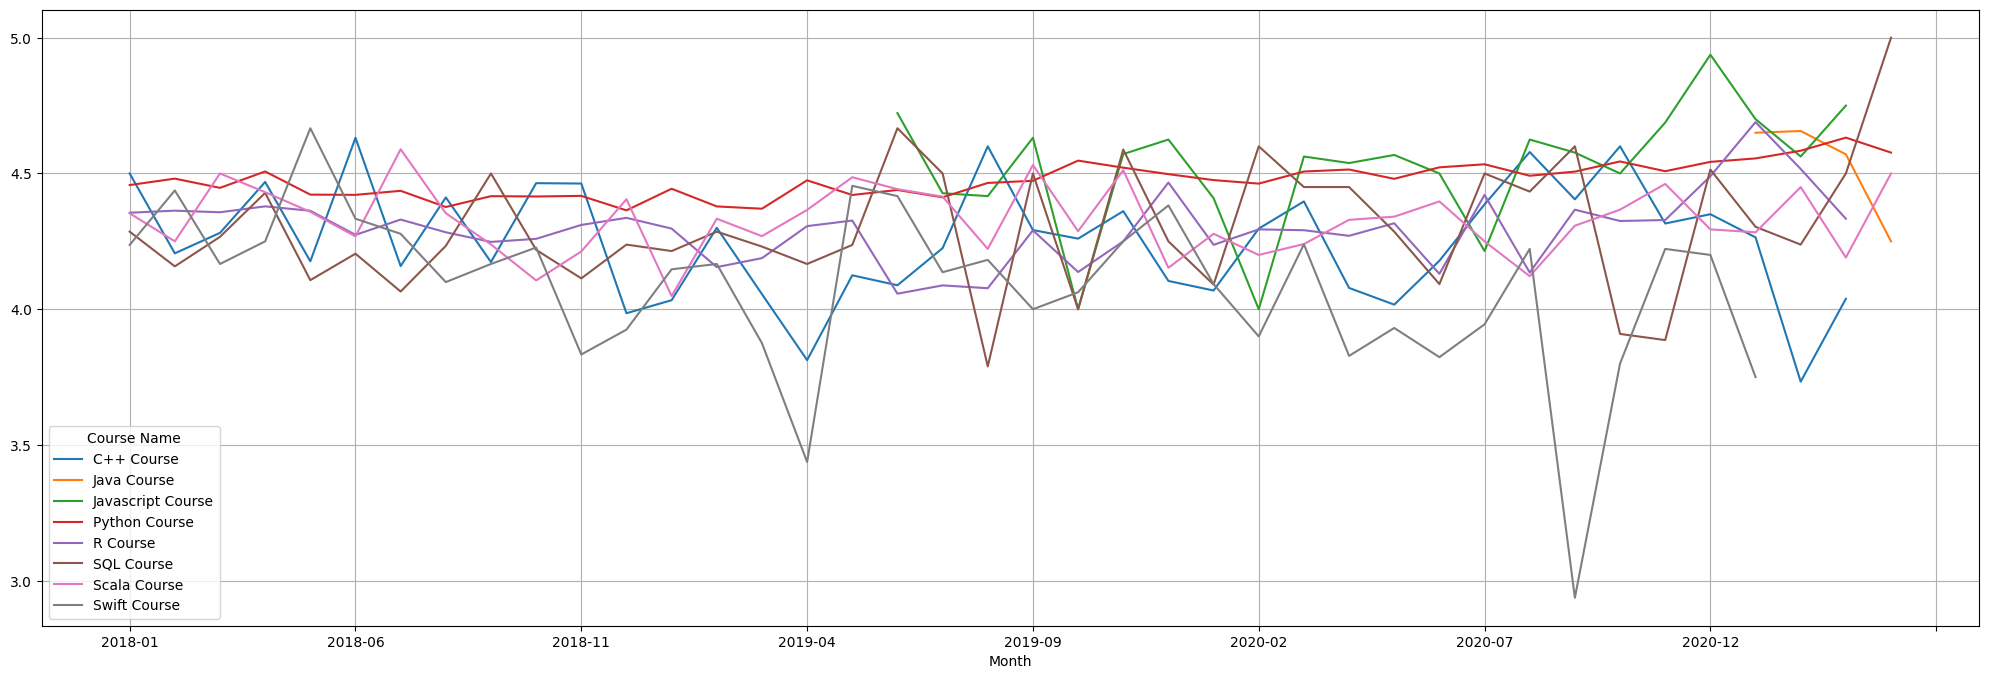

In [17]:
month_average_crs.plot(figsize=(25,8), grid=True)